#### Carregando as importações

In [1]:
import import_ipynb
from image_data_generator import *

importing Jupyter notebook from image_data_generator.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_models_DL.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb
Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [3]:
# Define a arquitetura da CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [4]:
# Compila o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Treina o modelo
history = model.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
161/161 [==============================] - 68s 418ms/step - loss: 1.0468 - accuracy: 0.4940 - val_loss: 1.0336 - val_accuracy: 0.5074
Epoch 2/30
161/161 [==============================] - 71s 439ms/step - loss: 0.9819 - accuracy: 0.5202 - val_loss: 0.9797 - val_accuracy: 0.5403
Epoch 3/30
161/161 [==============================] - 59s 366ms/step - loss: 0.9467 - accuracy: 0.5280 - val_loss: 0.9989 - val_accuracy: 0.5199
Epoch 4/30
161/161 [==============================] - 67s 414ms/step - loss: 0.9228 - accuracy: 0.5423 - val_loss: 1.0023 - val_accuracy: 0.5192
Epoch 5/30
161/161 [==============================] - 58s 363ms/step - loss: 0.9157 - accuracy: 0.5485 - val_loss: 1.0402 - val_accuracy: 0.5364
Epoch 6/30
161/161 [==============================] - 68s 423ms/step - loss: 0.9015 - accuracy: 0.5499 - val_loss: 1.0626 - val_accuracy: 0.5192
Epoch 7/30
161/161 [==============================] - 77s 478ms/step - loss: 0.8953 - accuracy: 0.5581 - val_loss: 1.0612 - val_ac

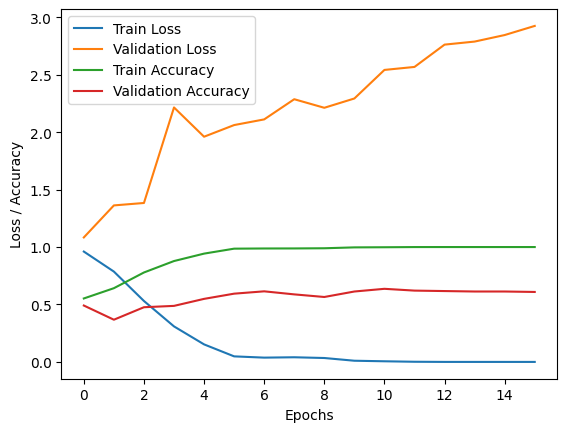

In [21]:
# Plota os gráficos de perda e acurácia
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

In [6]:
# Avalia o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(dataset_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

200/200 [==============================] - 19s 97ms/step - loss: 0.9438 - accuracy: 0.5391
Test Loss: 0.94380784034729
Test Accuracy: 0.5390625


200/200 [==============================] - 14s 68ms/step
Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.93      0.90      0.92       896
 Moderate_Demented       1.00      0.91      0.95        64
      Non_Demented       0.97      0.90      0.94      3200
Very_Mild_Demented       0.86      0.97      0.91      2240

          accuracy                           0.92      6400
         macro avg       0.94      0.92      0.93      6400
      weighted avg       0.93      0.92      0.92      6400



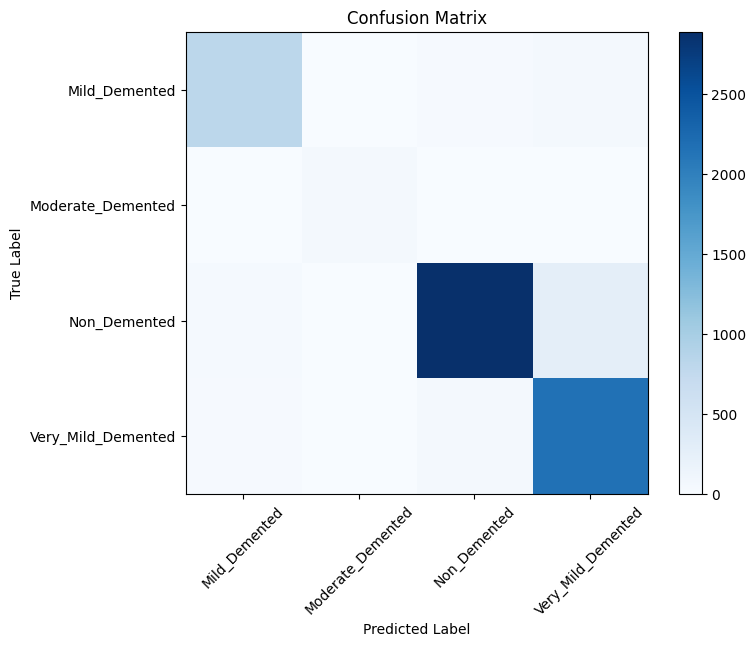

In [24]:
# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()